In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### priceanalysis

###### Q1: What are the average rental prices in neighbourhoods and cities? 

###### Q2: How do prices vary depending on the property? (Entire Home, Private Room, Shared Room)

###### Q3: What is the occupancy rate for different properties?

###### Q4: Are there certain events or times of the year that led to increase in demand?

###### Q5: Is there a correlation between the number of amenities and rental price?

###### Q6: What are the common reasons for positive and negative reviews?

###### Q7: Are there any characteristics that correlate with rental price?

###### Q8: Identify multi-collinearity of the features

###### Q9: Build a model to predict rental prices based on various features.

In [2]:
calendar = pd.read_csv('calendar.csv')
listings = pd.read_csv('listings.csv')
nh = pd.read_csv('neighbourhoods.csv')
reviews = pd.read_csv('reviews.csv')

C:\Users\SainathDevulapalli\AppData\Local\Temp\ipykernel_26856\2504032925.py:2: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  listings = pd.read_csv('listings.csv')


In [3]:
datasets = [calendar,listings,nh,reviews]
datasets_name = ['calendar', 'listings', 'nh', 'reviews']

##### Below for loop will give us shape of datasets.

In [4]:
for i in range(len(datasets)):
    print(datasets_name[i] + ' shape ' + str(datasets[i].shape) )
   

calendar shape (32100363, 7)
listings shape (87946, 75)
nh shape (33, 2)
reviews shape (1581033, 6)


##### Q1: What are top 10 neighbourhoods by average rental prices ?

In [5]:
li_col = listings.columns
for i in li_col:
    if (i=='neighbourhood'):
        print('yes')

yes


In [6]:
listings['neighbourhood'].unique()

array([nan, 'Hammersmith, England, United Kingdom',
       'Islington, Greater London, United Kingdom',
       'London, United Kingdom', 'London, Fitzrovia, United Kingdom',
       'Poplar, United Kingdom', 'Barnet, England, United Kingdom',
       'London, England, United Kingdom',
       'London, Greater London, United Kingdom',
       'Lambeth, England, United Kingdom',
       " St Margaret's, Isleworth, Middlesex, United Kingdom",
       'Highgate, London , England, United Kingdom',
       'Richmond, United Kingdom', 'East Finchley, United Kingdom',
       'Hounslow, Greater London, United Kingdom',
       'Camden Town, Greater London, United Kingdom',
       'Walthamstow, Greater London, United Kingdom',
       'Richmond, England, United Kingdom',
       'Kensington, Greater London, United Kingdom',
       'Greater London, United Kingdom',
       'Ealing, England, United Kingdom',
       'Muswell Hill, London, United Kingdom',
       'Hackney, England, United Kingdom',
       'Not

In [8]:
# Preprocessing for Q1

calendar = calendar.rename({'listing_id':'id'}, axis= 1)
q1 = calendar.merge(listings[['id','neighbourhood']],on = 'id',how = 'left')
q1['price'] = q1['price'].astype('str')
q1['price'] = q1['price'].fillna(0)
q1 = q1.loc[q1['price'] != 'nan']
q1 = q1.reset_index(drop=True)

t = []
for i in range(len(q1)):
    t.append(q1['price'][i].split('$')[1].replace(',',''))

q1['price'] = t

q1.head()

In [84]:
# Final dataset for Q1

q1['price'] = q1['price'].astype(float)
q1_final = q1.groupby(['neighbourhood'])['price'].mean().reset_index(drop=False)
q1_final = q1_final.rename({'price':'Mean Price'},axis=1)
q1_final = q1_final.sort_values(['Mean Price'], ascending=False).reset_index(drop=True)
#q1_final['Mean Price'] = ['$'+str(round(x,2)) for x in q1_final['Mean Price']] -> To add dollar sign
q1_final

,neighbourhood,Mean Price
0,"Hackney, Greater London, United Kingdom",4308.931507
1,"London, Stratford, United Kingdom",2889.134247
2,"London , Hampstead village, United Kingdom",2000.000000
3,"London , UK, United Kingdom",1824.153425
4,"Dagenham, England, United Kingdom",1787.659932
...,...,...
876,"Mitcham, Greater London, United Kingdom",22.042466
877,"London, greater London, United Kingdom",22.000000
878,"ロンドン, イングランド, United Kingdom",21.753425
879,"Londres, England, GB, London, United Kingdom",20.000000


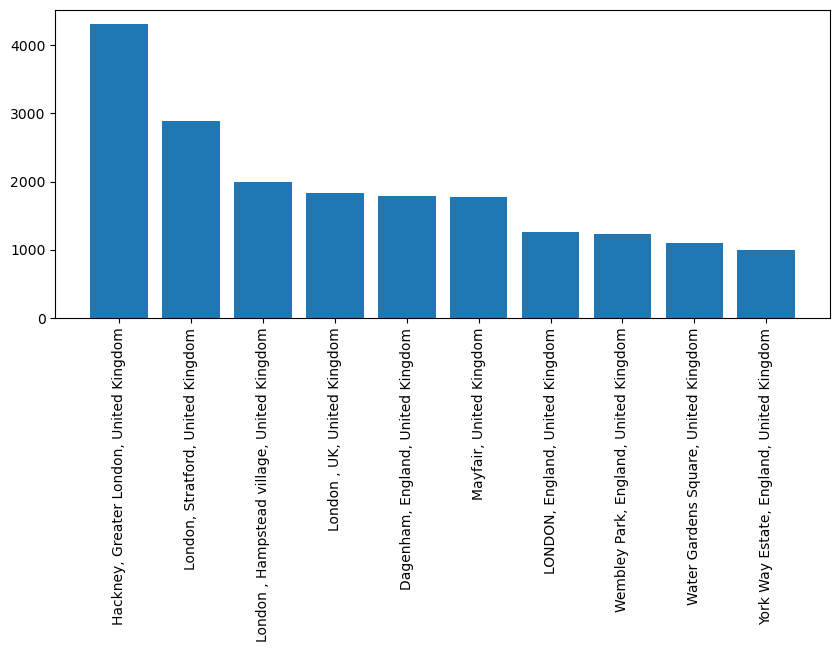

In [88]:
Neighbourhood = q1_final['neighbourhood'].head(10)
price = q1_final['Mean Price'].head(10)
 
# Figure Size
fig = plt.figure(figsize =(10, 4))
 
# Horizontal Bar Plot
plt.bar(Neighbourhood, price)
plt.xticks(ticks=range(len(Neighbourhood)), labels=Neighbourhood, rotation=90)
# Show Plot
plt.show()

##### Q2: How do prices vary depending on the property? (Entire Home, Private Room, Shared Room)

In [92]:
li_col = listings.columns
for i in li_col:
    if (i=='room_type'):
        print('yes')

yes


In [113]:
q2 = listings[['id','room_type','price']]
q2['price'] = q2['price'].astype('str')
q2['price'] = q2['price'].fillna(0)
q2 = q2.loc[q2['price'] != 'nan']
q2 = q2.reset_index(drop=True)

t = []
for i in range(len(q2)):
    t.append(q2['price'][i].split('$')[1].replace(',',''))

q2['price'] = t
q2['price'] = q2['price'].astype(float)


C:\Users\SainathDevulapalli\AppData\Local\Temp\ipykernel_23644\420175328.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q2['price'] = q2['price'].astype('str')
C:\Users\SainathDevulapalli\AppData\Local\Temp\ipykernel_23644\420175328.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q2['price'] = q2['price'].fillna(0)


In [115]:
q2_final = q2.groupby(['room_type'])['price'].mean().reset_index(drop=False).rename({'price':'Mean'},axis=1).round()
q2_final['std_dev'] = q2.groupby(['room_type'])['price'].std().reset_index(drop=False).rename({'price':'std'},axis=1)['std'].round()
q2_final['max'] = q2.groupby(['room_type'])['price'].max().reset_index(drop=False).rename({'price':'max'},axis=1)['max'].round()
q2_final

,room_type,Mean,std_dev,max
0,Entire home/apt,230.0,518.0,80100.0
1,Hotel room,256.0,195.0,1275.0
2,Private room,100.0,417.0,53588.0
3,Shared room,120.0,460.0,8888.0


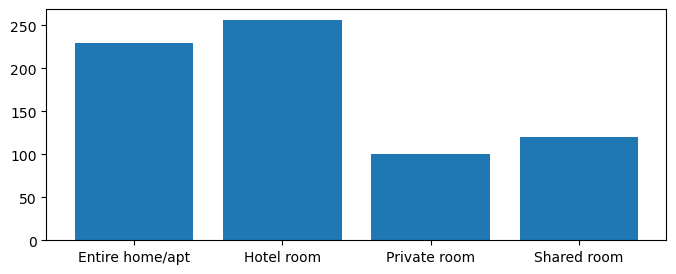

In [109]:
room_type = q2_final['room_type'].head(10)
price = q2_final['Mean'].head(10)
 
# Figure Size
fig = plt.figure(figsize =(8, 3))
 
# Horizontal Bar Plot
plt.bar(room_type, price)
plt.xticks(ticks=range(len(room_type)), labels=room_type)
# Show Plot
plt.show()

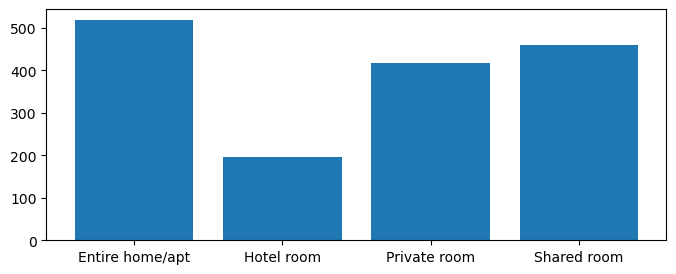

In [116]:
room_type = q2_final['room_type'].head(10)
price = q2_final['std_dev'].head(10)
 
# Figure Size
fig = plt.figure(figsize =(8, 3))
 
# Horizontal Bar Plot
plt.bar(room_type, price)
plt.xticks(ticks=range(len(room_type)), labels=room_type)
# Show Plot
plt.show()

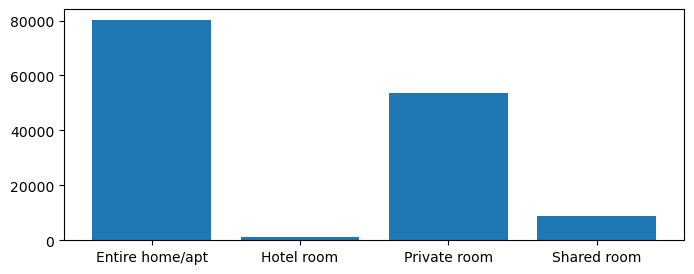

In [110]:
room_type = q2_final['room_type'].head(10)
price = q2_final['max'].head(10)
 
# Figure Size
fig = plt.figure(figsize =(8, 3))
 
# Horizontal Bar Plot
plt.bar(room_type, price)
plt.xticks(ticks=range(len(room_type)), labels=room_type)
# Show Plot
plt.show()

##### Q3: What is the availability rate for different properties?

In [118]:
q3 = listings[['id','room_type','availability_365']]
q3['availability_365'] = q3['availability_365'].astype(int)
q3['availability_365'] = q3['availability_365'].fillna(0)
q3 = q3.loc[q3['availability_365'] != 'nan']
q3 = q3.reset_index(drop=True)

C:\Users\SainathDevulapalli\AppData\Local\Temp\ipykernel_23644\1291864678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q3['availability_365'] = q3['availability_365'].astype(int)
C:\Users\SainathDevulapalli\AppData\Local\Temp\ipykernel_23644\1291864678.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q3['availability_365'] = q3['availability_365'].fillna(0)


In [122]:
q3_final = q3.groupby(['room_type'])['availability_365'].mean().reset_index(drop=False)
q3_final['availability_rate_per'] = q3_final['availability_365']*100/365
q3_final

,room_type,availability_365,availability_rate_per
0,Entire home/apt,122.941237,33.682531
1,Hotel room,199.022831,54.526803
2,Private room,117.521262,32.197606
3,Shared room,122.551020,33.575622


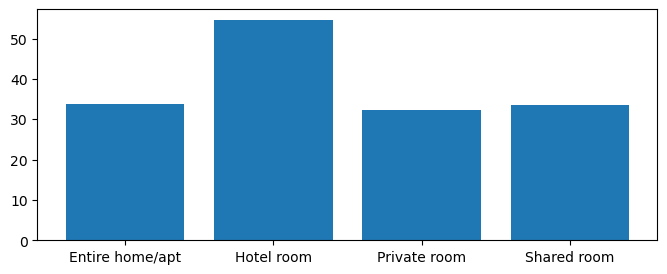

In [124]:
room_type = q3_final['room_type'].head(10)
price = q3_final['availability_rate_per'].head(10)
 
# Figure Size
fig = plt.figure(figsize =(8, 3))
 
# Horizontal Bar Plot
plt.bar(room_type, price)
plt.xticks(ticks=range(len(room_type)), labels=room_type)
# Show Plot
plt.show()

##### Q4: Are there certain events or times of the year that led to increase in availability in neighbourhood?

In [3]:
calendar = calendar.rename({'listing_id':'id'}, axis= 1)
q4 = calendar.merge(listings[['id','neighbourhood']],on = 'id',how = 'left')
q4 = q4.loc[q4['available']=='f']

In [4]:
q4['year_month'] = [x[:7] for x in q4['date'].astype('str')]

In [17]:
q4_final = q4.groupby(['year_month','neighbourhood'])['id'].nunique().reset_index(drop=False).rename({'id':'Airbnbs'},axis=1)
q4_final_gl = q4_final.loc[q4_final['neighbourhood'] == 'Greater London, England, United Kingdom']

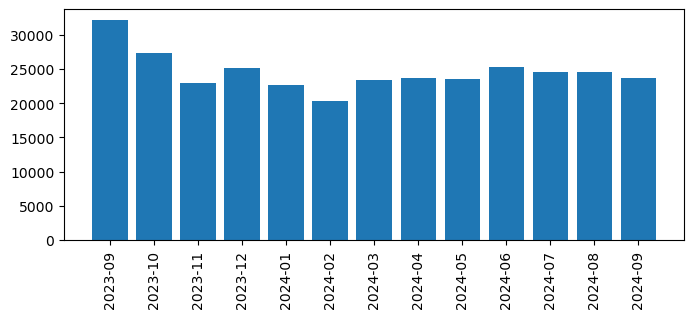

In [20]:
year_month = q4_final_gl['year_month']
price = q4_final_gl['Airbnbs']
 
# Figure Size
fig = plt.figure(figsize =(8, 3))
 
# Horizontal Bar Plot
plt.bar(year_month, price)

plt.xticks(ticks=range(len(year_month)), labels=year_month, rotation=90)
# Show Plot
plt.show()


##### Q5: Is there a correlation between the number of amenities and rental price?

In [34]:
q5 = listings[['id','amenities','price']]
s = []
for j in range(len(q5)):
    m = []
    for i in range(len(listings['amenities'][j].split("\""))):
        if i % 2 != 0:
            m.append(listings['amenities'][j].split("\"")[i])

    s.append(len(m))

q5['no_of_amenities'] = s

q5.head()

C:\Users\SainathDevulapalli\AppData\Local\Temp\ipykernel_24152\2470671898.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q5['no_of_amenities'] = s


,id,amenities,price,no_of_amenities
0,92644,"[""Heating"", ""TV with standard cable"", ""Wifi"", ...",$42.00,8
1,93015,"[""Window guards"", ""Bathtub"", ""Hot water kettle...",$175.00,48
2,13913,"[""Bathtub"", ""Hot water kettle"", ""Laundromat ne...",$79.00,55
3,15400,"[""Shampoo"", ""Luggage dropoff allowed"", ""Dryer""...",$150.00,25
4,93734,"[""Window guards"", ""Bathtub"", ""Hot water kettle...",$46.00,46


In [35]:
q5['price'] = q5['price'].astype('str')
q5['price'] = q5['price'].fillna(0)
q5 = q5.loc[q5['price'] != 'nan']
q5 = q5.reset_index(drop=True)

t = []
for i in range(len(q5)):
    t.append(q5['price'][i].split('$')[1].replace(',',''))

q5['price'] = t
q5['price'] = q5['price'].astype(float)

C:\Users\SainathDevulapalli\AppData\Local\Temp\ipykernel_24152\865584188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q5['price'] = q5['price'].astype('str')
C:\Users\SainathDevulapalli\AppData\Local\Temp\ipykernel_24152\865584188.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q5['price'] = q5['price'].fillna(0)


In [37]:
q5['no_of_amenities'].corr(q5['price'])

0.04876239753897753

##### Q6: Bottom 10 neighbourhoods by average acceptance rate?

In [20]:
q6 = listings[['neighbourhood','host_acceptance_rate','id']]
q6 = q6.dropna().reset_index(drop=True)

t = []
for i in range(len(q6)):
    t.append(q6['host_acceptance_rate'][i].split('%')[0])

q6['host_acceptance_rate'] = t
q6['host_acceptance_rate'] = q6['host_acceptance_rate'].astype(float)

q6.head()

,neighbourhood,host_acceptance_rate,id
0,"Hammersmith, England, United Kingdom",25.0,93015
1,"Islington, Greater London, United Kingdom",88.0,13913
2,"London, United Kingdom",41.0,15400
3,"London, Fitzrovia, United Kingdom",100.0,17402
4,"London, United Kingdom",0.0,24328


In [29]:
q6_final = q6.groupby(['neighbourhood'])['host_acceptance_rate'].mean().reset_index().sort_values('host_acceptance_rate',ascending=True)
q6_final = q6_final.loc[q6_final['host_acceptance_rate'] != 0]
q6_final = q6_final.head(10).reset_index(drop=True)

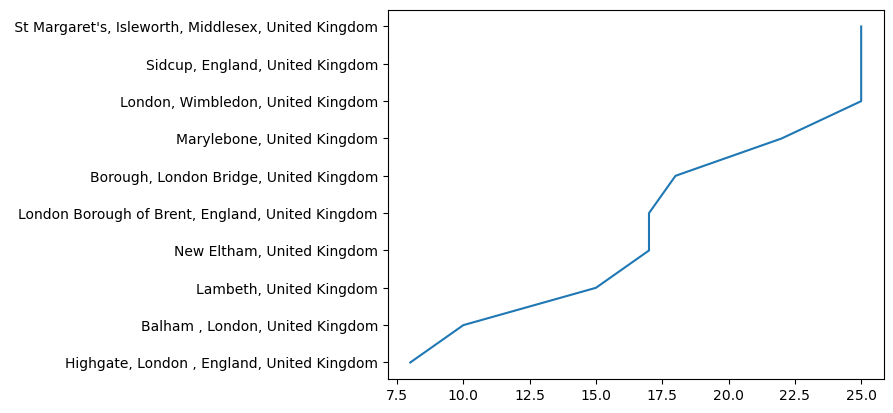

<Figure size 500x200 with 0 Axes>

In [37]:
x = q6_final['neighbourhood']
y = q6_final['host_acceptance_rate'] 
  
plt.plot(y, x)  # Plot the chart 

fig = plt.figure(figsize =(5, 2))

##### Q7: Are there any characteristics that correlate with rental price?

In [71]:
q7 = listings[['host_id','host_response_rate','host_acceptance_rate','host_is_superhost','neighbourhood','property_type',
               'room_type','accommodates','beds','number_of_reviews','number_of_reviews_ltm',
               'number_of_reviews_l30d','review_scores_rating','review_scores_accuracy','review_scores_value',
               'instant_bookable','reviews_per_month','price']]

In [72]:
for i in q7.columns:
    print(str(i) + ' ' + str(q7[i].isna().sum()))

host_id 0
host_response_rate 28918
host_acceptance_rate 25188
host_is_superhost 932
neighbourhood 40755
property_type 0
room_type 0
accommodates 0
beds 1134
number_of_reviews 0
number_of_reviews_ltm 0
number_of_reviews_l30d 0
review_scores_rating 22158
review_scores_accuracy 23093
review_scores_value 23126
instant_bookable 0
reviews_per_month 22158
price 0


In [73]:
q7['neighbourhood'] = q7['neighbourhood'].fillna('not mentioned')
q7['host_is_superhost'] = q7['host_is_superhost'].fillna('f')
q7['host_response_rate'] = q7['host_response_rate'].fillna('0%')
q7['host_acceptance_rate'] = q7['host_acceptance_rate'].fillna('0%')

q7 = q7.fillna(0)

C:\Users\SainathDevulapalli\AppData\Local\Temp\ipykernel_26856\3848866691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q7['neighbourhood'] = q7['neighbourhood'].fillna('not mentioned')
C:\Users\SainathDevulapalli\AppData\Local\Temp\ipykernel_26856\3848866691.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q7['host_is_superhost'] = q7['host_is_superhost'].fillna('f')
C:\Users\SainathDevulapalli\AppData\Local\Temp\ipykernel_26856\3848866691.py:3: SettingWithCopyWarning: 
A value is trying to be set

In [74]:
t = []
for i in range(len(q7)):
    t.append(q7['host_acceptance_rate'][i].split('%')[0])

q7['host_acceptance_rate'] = t
q7['host_acceptance_rate'] = q7['host_acceptance_rate'].astype(float)

t = []
for i in range(len(q7)):
    t.append(q7['host_response_rate'][i].split('%')[0])

q7['host_response_rate'] = t
q7['host_response_rate'] = q7['host_response_rate'].astype(float)

t = []
for i in range(len(q7)):
    t.append(q7['price'][i].split('$')[1].replace(',',''))

q7['price'] = t
q7['price'] = q7['price'].astype(float)

In [76]:
q7.dtypes

host_id                     int64
host_response_rate        float64
host_acceptance_rate      float64
host_is_superhost          object
neighbourhood              object
property_type              object
room_type                  object
accommodates                int64
beds                      float64
number_of_reviews           int64
number_of_reviews_ltm       int64
number_of_reviews_l30d      int64
review_scores_rating      float64
review_scores_accuracy    float64
review_scores_value       float64
instant_bookable           object
reviews_per_month         float64
price                     float64
dtype: object

In [77]:
q7_num = q7.select_dtypes(exclude='object')
q7_cat = q7.select_dtypes(include='object')

In [81]:
from sklearn.preprocessing import LabelEncoder

q7_cat[['host_is_superhost', 'neighbourhood','property_type','room_type','instant_bookable']] = q7_cat[['host_is_superhost', 'neighbourhood','property_type','room_type','instant_bookable']].apply(LabelEncoder().fit_transform)

In [83]:
q7_final = pd.concat([q7_cat,q7_num],axis=1)
q7_final

,host_is_superhost,neighbourhood,property_type,room_type,instant_bookable,host_id,host_response_rate,host_acceptance_rate,accommodates,beds,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_value,reviews_per_month,price
0,0,869,56,2,1,498201,0.0,100.0,2,2.0,216,9,0,4.57,4.74,4.68,1.45,42.0
1,0,248,19,0,0,499704,100.0,25.0,5,3.0,38,2,0,4.82,4.76,4.74,0.27,175.0
2,0,325,56,2,0,54730,100.0,88.0,1,1.0,41,11,0,4.80,4.72,4.69,0.26,79.0
3,0,533,19,0,0,60302,100.0,41.0,2,1.0,94,5,0,4.80,4.85,4.74,0.56,150.0
4,1,869,40,2,0,497514,90.0,75.0,2,1.0,180,25,3,4.62,4.70,4.67,1.21,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87941,1,869,19,0,0,498408783,100.0,100.0,3,2.0,0,0,0,0.00,0.00,0.00,0.00,275.0
87942,0,869,19,0,0,36645347,0.0,0.0,2,1.0,0,0,0,0.00,0.00,0.00,0.00,145.0
87943,0,869,47,2,0,340514057,100.0,98.0,7,5.0,0,0,0,0.00,0.00,0.00,0.00,160.0
87944,0,869,15,0,1,439074505,81.0,99.0,10,5.0,0,0,0,0.00,0.00,0.00,0.00,680.0


In [84]:
q7_final.corr()

,host_is_superhost,neighbourhood,property_type,room_type,instant_bookable,host_id,host_response_rate,host_acceptance_rate,accommodates,beds,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_value,reviews_per_month,price
host_is_superhost,1.000000,-0.086489,0.001875,0.035410,-0.018092,-0.039479,0.290704,0.304221,-0.003210,0.008448,0.241216,0.302003,0.204829,0.206364,0.199010,0.201737,0.231059,-0.007136
neighbourhood,-0.086489,1.000000,0.081433,0.086102,0.022880,0.043323,-0.094078,-0.110919,-0.071775,-0.060589,-0.102041,-0.105206,-0.088418,-0.200032,-0.199398,-0.197907,-0.090984,-0.015178
property_type,0.001875,0.081433,1.000000,0.940433,-0.022393,-0.019031,-0.136688,-0.149157,-0.469651,-0.346371,0.102691,0.054823,0.003077,-0.068670,-0.068428,-0.057889,0.009468,-0.111446
room_type,0.035410,0.086102,0.940433,1.000000,-0.045829,-0.022414,-0.121997,-0.133541,-0.497195,-0.360360,0.106826,0.083327,0.019179,-0.046842,-0.047425,-0.035676,0.032090,-0.128527
instant_bookable,-0.018092,0.022880,-0.022393,-0.045829,1.000000,0.173352,0.143575,0.237160,0.068233,0.039208,0.000174,0.057414,0.062535,-0.035988,-0.033748,-0.036724,0.102517,0.043365
host_id,-0.039479,0.043323,-0.019031,-0.022414,0.173352,1.000000,0.208885,0.245996,0.033769,0.023065,-0.125926,0.032484,0.078493,-0.131727,-0.131552,-0.134332,0.148819,0.026294
host_response_rate,0.290704,-0.094078,-0.136688,-0.121997,0.143575,0.208885,1.000000,0.803578,0.126814,0.108869,0.167176,0.305099,0.292748,0.181289,0.177438,0.172720,0.350734,0.069904
host_acceptance_rate,0.304221,-0.110919,-0.149157,-0.133541,0.237160,0.245996,0.803578,1.000000,0.119584,0.097466,0.187221,0.337207,0.297346,0.226628,0.223719,0.218159,0.380393,0.074014
accommodates,-0.003210,-0.071775,-0.469651,-0.497195,0.068233,0.033769,0.126814,0.119584,1.000000,0.827468,-0.042517,-0.019679,0.023676,0.014448,0.012567,0.007797,0.011740,0.187875
beds,0.008448,-0.060589,-0.346371,-0.360360,0.039208,0.023065,0.108869,0.097466,0.827468,1.000000,-0.030609,-0.014114,0.021352,0.011574,0.009699,0.006992,0.003572,0.161341


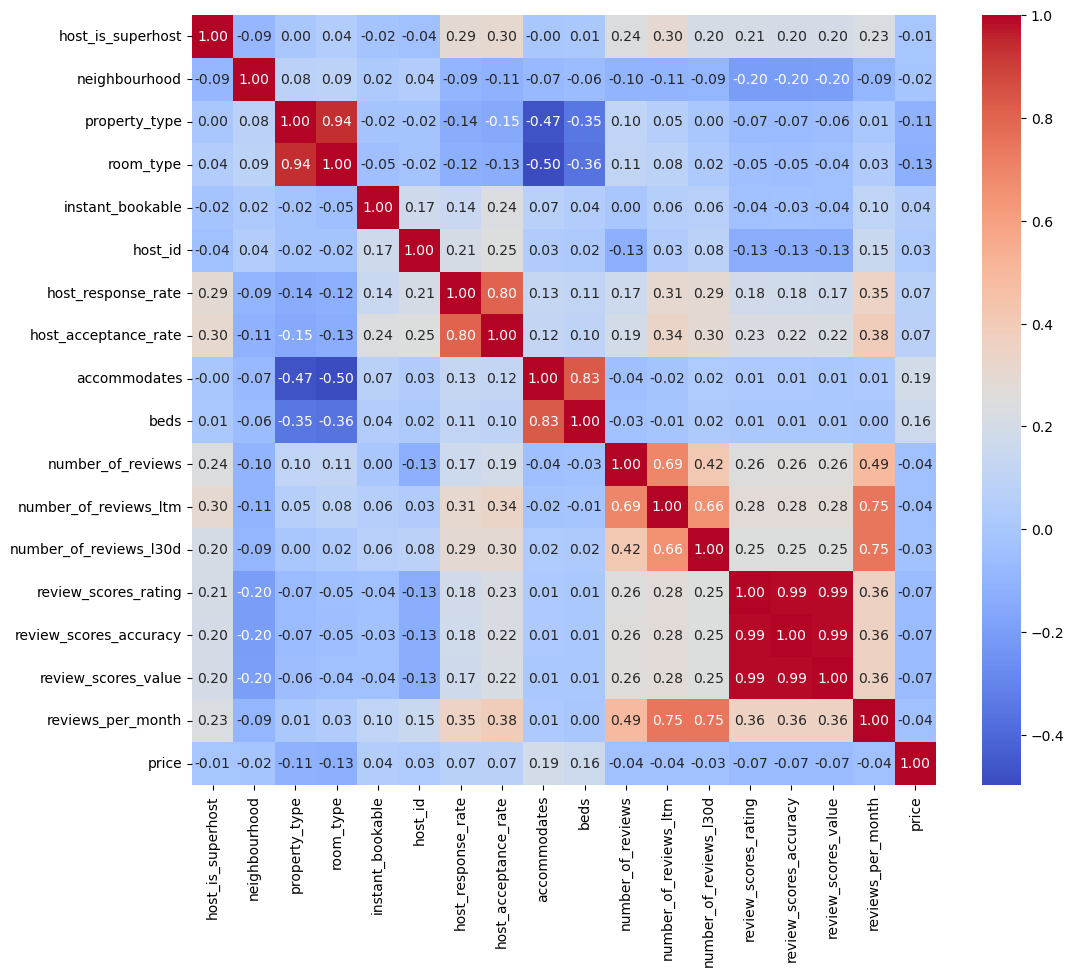

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming q7_final is your DataFrame

# Calculate correlation matrix
correlation = q7_final.corr()

# Set the size of the plot
plt.figure(figsize=(12, 10))

# Create the heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")

# Display the plot
plt.show()

##### Q8: Identify multi-collinearity of the features

In [94]:
# VIF (Variance Inflation Factor)

from statsmodels.stats.outliers_influence import variance_inflation_factor 

X = q7_final.drop(columns=['price','review_scores_rating','review_scores_accuracy','property_type','beds'],axis=1)

vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

                   feature       VIF
0        host_is_superhost  1.417191
1            neighbourhood  3.275425
2                room_type  1.767280
3         instant_bookable  1.535951
4                  host_id  2.171911
5       host_response_rate  8.151094
6     host_acceptance_rate  9.218034
7             accommodates  3.332861
8        number_of_reviews  2.406519
9    number_of_reviews_ltm  4.343307
10  number_of_reviews_l30d  2.805669
11     review_scores_value  3.589162
12       reviews_per_month  4.584036


##### Q9: Build a model to predict rental prices based on various features.

In [140]:
q9 = q7_final.drop(columns=['review_scores_rating','review_scores_accuracy','property_type','beds'],axis=1)

q9.head()

,host_is_superhost,neighbourhood,room_type,instant_bookable,host_id,host_response_rate,host_acceptance_rate,accommodates,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_value,reviews_per_month,price
0,0,869,2,1,498201,0.0,100.0,2,216,9,0,4.68,1.45,42.0
1,0,248,0,0,499704,100.0,25.0,5,38,2,0,4.74,0.27,175.0
2,0,325,2,0,54730,100.0,88.0,1,41,11,0,4.69,0.26,79.0
3,0,533,0,0,60302,100.0,41.0,2,94,5,0,4.74,0.56,150.0
4,1,869,2,0,497514,90.0,75.0,2,180,25,3,4.67,1.21,46.0


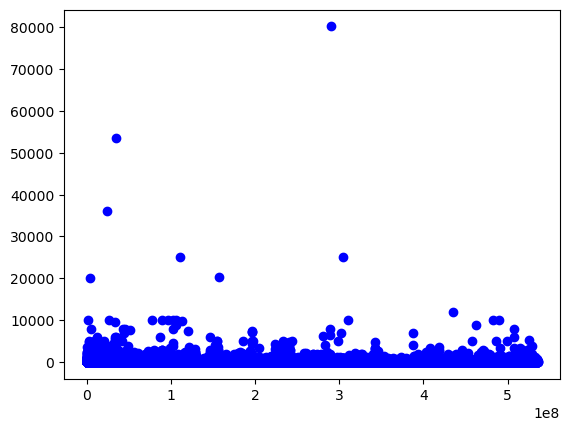

In [141]:
plt.scatter(q9['host_id'], q9['price'], color ='b')
plt.show()

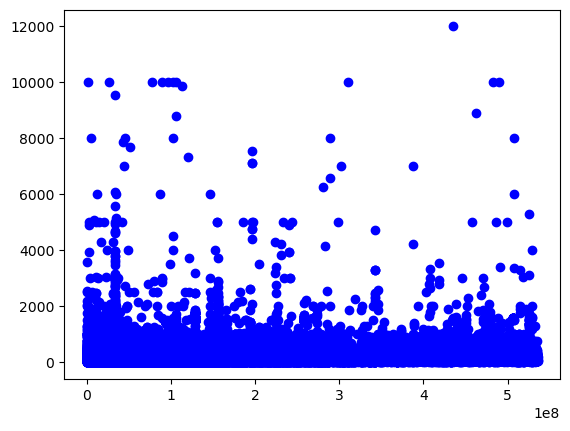

In [142]:
# Removing outliers

q9 = q9.loc[q9['price'] <= 12000]

plt.scatter(q9['host_id'], q9['price'], color ='b')
plt.show()

In [143]:
df_else = q9.sample(frac=0.9, random_state=25)
df_test = q9.drop(df_else.index)

In [144]:
print(df_else.shape)
print(df_test.shape)

(79145, 14)
(8794, 14)


In [145]:
df_train = df_else.sample(frac=0.8, random_state = 20)
df_val = df_else.drop(df_train.index)

print(df_train.shape)
print(df_val.shape)

(63316, 14)
(15829, 14)


In [146]:
df_train_x = df_train.drop(['price'],axis=1)
df_train_y = df_train[['price']]

df_val_x = df_val.drop(['price'], axis=1)
df_val_y = df_val[['price']]

df_train_x = df_train_x.reset_index(drop=True)
df_val_x = df_val_x.reset_index(drop=True)
df_train_y = df_train_y.reset_index(drop=True)
df_val_y = df_val_y.reset_index(drop=True)

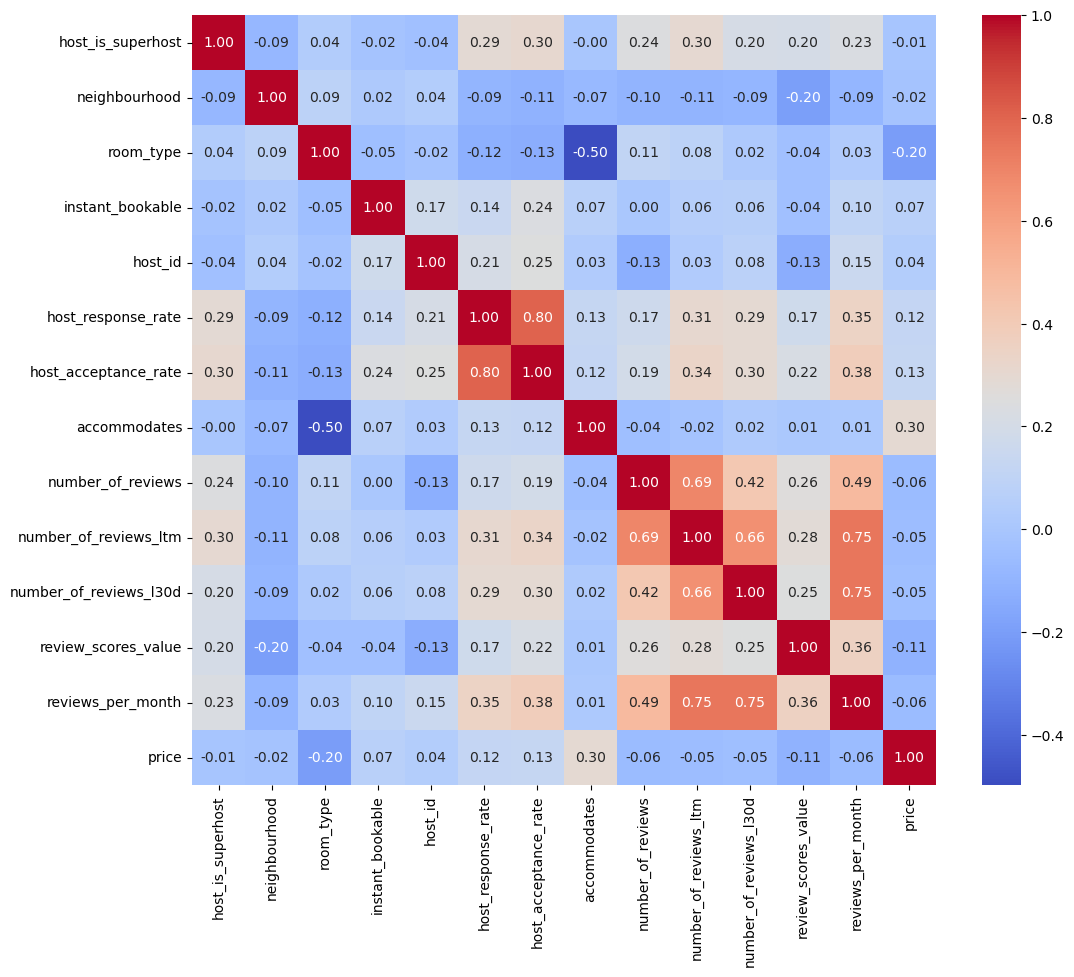

In [125]:

# Calculate correlation matrix
correlation = q9.corr()

# Set the size of the plot
plt.figure(figsize=(12, 10))

# Create the heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")

# Display the plot
plt.show()

In [147]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
 
regr.fit(df_train_x, df_train_y)
print(regr.score(df_val_x, df_val_y))

0.1338242778493285


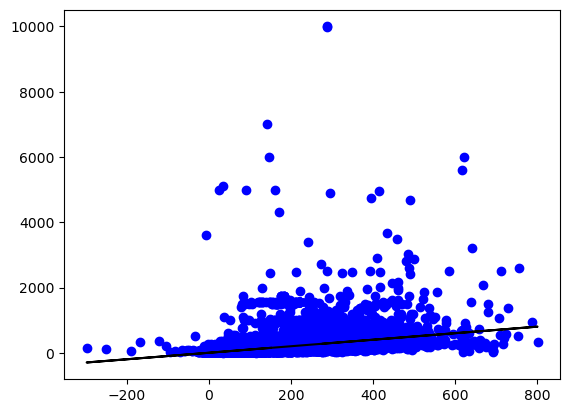

In [148]:
y_pred = regr.predict(df_val_x)

b = []
for i in range(len(df_val_y)):
    b.append(y_pred[i][0])

plt.scatter(b, df_val_y['price'], color ='b')
plt.plot(b, y_pred, color ='k')
 
plt.show()

In [150]:
df_train_x.shape

(63316, 13)

In [151]:
import numpy as np
from sklearn.metrics import r2_score

print('r2: ', r2_score(df_val_y['price'],b))

print('adj r2 ', 1-(1-r2_score(df_val_y['price'],b))*(df_train_x.shape[0]-1)/(df_train_x.shape[0]-df_train_x.shape[1]))

r2:  0.1338242778493285
adj r2  0.13366008170276666


In our case, an adjusted R-squared of (0.13366008170276666) means that approximately (13.37%) of the variability in the dependent variable is explained by the independent variables in your regression model, after adjusting for the number of predictors. The remaining (86.63%) of the variability is not explained by the model.

Interpretation:
- A higher adjusted R-squared indicates a better fit of the model to the data.
- A lower adjusted R-squared suggests that the model may not be capturing a significant portion of the variability in the dependent variable.

It's essential to interpret the adjusted R-squared in the context of the specific problem and the field of study. 

##### Q10: Feature importance of the features used

In [162]:

importance = regr.coef_
n = df_train_x.columns
g = []

for i in range(len(n)):
    g.append(importance[0][i])

tdf = pd.DataFrame(data=n,columns=['Feature'])
tdf['importance'] = g 

tdf

,Feature,importance
0,host_is_superhost,-9.946956e+00
1,neighbourhood,-1.026376e-02
2,room_type,-1.765540e+01
3,instant_bookable,1.267891e+01
4,host_id,-2.709779e-08
5,host_response_rate,2.223295e-01
6,host_acceptance_rate,8.382313e-01
7,accommodates,3.806356e+01
8,number_of_reviews,-3.493528e-02
9,number_of_reviews_ltm,-1.151920e-01


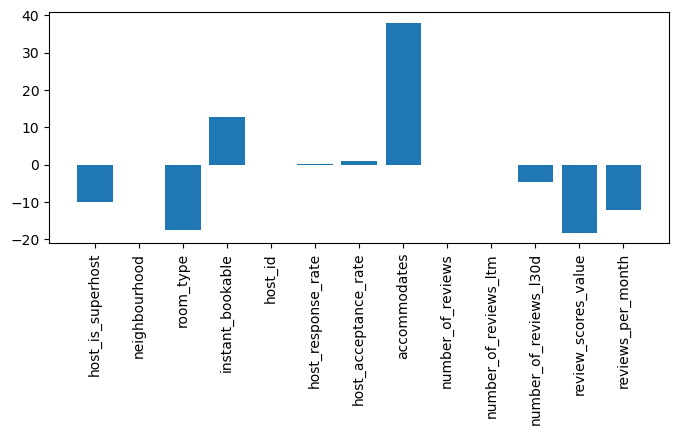

In [164]:
features = tdf['Feature']
importance = tdf['importance']
 
# Figure Size
fig = plt.figure(figsize =(8, 3))
 
# Horizontal Bar Plot
plt.bar(features, importance)

plt.xticks(ticks=range(len(features)), labels=features, rotation=90)
# Show Plot
plt.show()
